In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

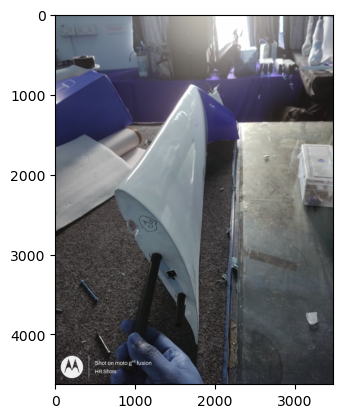

In [2]:
img=cv.imread(r"D:\Data centr\IMG_data\UAV_Data\RightWing\IMG_20250418_123206806.jpg")
plt.imshow(img)

# Preprocess

In [3]:
def detect_wing_side(img):
    # Segmentation
    rgb_img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
    gry_img=cv.cvtColor(rgb_img,cv.COLOR_RGB2GRAY)
    blur_img=cv.GaussianBlur(gry_img,(7,7),0)

    _,bw=cv.threshold(blur_img,200,255, cv.THRESH_BINARY_INV)

    # Shape Extraction- Contours gives closed boundaried
    # rectangular kernel used for smoothing edges, filling small gaps & remove noise
    kernel = cv.getStructuringElement(cv.MORPH_RECT, (5,5)) 
    cnts,_=cv.findContours(bw,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
    wing=max(cnts,key=cv.contourArea) # Larger wing area

    # Orientation Measurement
    # vx,vy is unit vector along span- principal axis
    [vx,vy,x0,y0]=cv.fitLine(wing,cv.DIST_L2,0,0.01,0.01)
    nx,ny=-vy,vx # orthogonal dir n=(-vy,vx)
    
    pts=wing.reshape(-1,2)
    projections=pts.dot(np.array([nx,ny]))
    mean_proj=projections.mean()

    # Decide Left/Right
    # Build orthogonal vector (-vy, vx)

    if nx>0:
        if mean_proj>0:
            return "Left Wing"
        elif mean_proj<0:
            return "Right Wing"
        else:
            return "Wrong Image, Try again"
        
    elif nx<0:
        if mean_proj>0:
            return "Right Wing"
        elif mean_proj<0:
            return "Left Wing"
        else:
            return "wrong Image"
        
    else:
        return "No imager"

In [4]:
print(detect_wing_side(img))

Right Wing


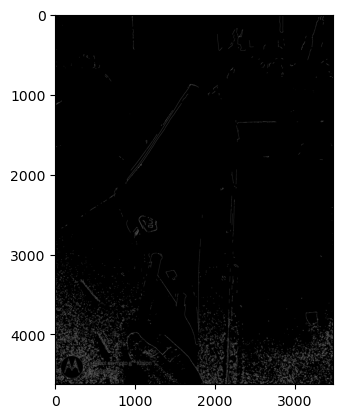

In [5]:
edges =cv.Canny(image= img, threshold1=100, threshold2=200) #first threshold for the hysteresis procedure in the Canny edge detection
edges =cv.cvtColor(edges, cv.COLOR_BGR2RGB)  #threshold2: This is the second threshold for the hysteresis procedure.
edges =cv.cvtColor(edges, cv.COLOR_BGR2RGB)  
plt.imshow(edges)